<!-- MINI PROJECT CONTEXT -->
# <p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:100%;text-align:center;border-radius:40px 40px;">Development of AI/ML based solution for detection of face-swap based deep fake images/videos</p>

<img src="https://github.com/EchoSingh/Deepfake-PRNU-Shield/blob/main/UI_images/topic.png?raw=true" style="display:block; margin:auto;">

<p style="font-family:newtimeroman; font-size:120%; color:#95856a;">
    I have chosen the challenge proposed by 
    <span style="color:#D8CA7E;"><strong>National Technical Research Organisation (NTRO)</strong></span>:
    <br><br>
    <em>“Development of AI/ML based solution for detection of face-swap based deep fake images/videos.”</em>
</p>

<p style="font-family:newtimeroman; font-size:120%; color:#95856a;">
    The entire solution is built using Python, TensorFlow, and Gradio — forming a full-stack AI system capable of both backend processing and real-time frontend interaction.
</p>

<p style="font-family:newtimeroman; font-size:120%; color:#95856a;">
    Key highlights of the implementation:
    <ul style="color:#95856a; font-size:110%; font-family:newtimeroman;">
        <li><strong>Dataset:</strong> A curated and balanced dataset of real and fake videos is processed into labeled image frames for training.</li>
        <li><strong>Data Pipeline:</strong> A custom <code>ImageDataGenerator</code> ensures dynamic, memory-efficient batch loading.</li>
        <li><strong>Model Architectures:</strong> The system explores several approaches:
            <ul>
                <li>Custom-built CNN architecture for quick prototyping</li>
                <li><strong>Xception</strong> and <strong>ResNet50</strong> using transfer learning for high-accuracy classification</li>
                <li>An enhanced dense model with Batch Normalization and Dropout for improved generalization</li>
            </ul>
        </li>
        <li><strong>Evaluation Metrics:</strong> Includes accuracy, confusion matrix, ROC-AUC curve, and detailed classification reports.</li>
        <li><strong>Deployment:</strong> A <strong>Gradio interface</strong> is integrated for users to upload images or frames and instantly receive predictions with confidence scores, making the system interactive and ready for real-world demos.</li>
    </ul>
</p>


<hr style="border: 1px solid #D8CA7E; margin-top: 30px;">


In [1]:
!pip install -U gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00


<a id="1"></a>
# <p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:120%;text-align:center;border-radius:40px 40px;">IMPORTING LIBRARIES</p>

<p style="font-family:newtimeroman;color:#95856a;font-size:150%">
    The following Libraries will be used in the project:
</p>

<ul style="font-family:newtimeroman;color:#95856a;font-size:120%">
    <li><strong>TensorFlow & Keras</strong> — for building and training deep learning models</li>
    <li><strong>OpenCV</strong> — for reading and preprocessing image frames from video</li>
    <li><strong>NumPy & Pandas</strong> — for numerical computations and data handling</li>
    <li><strong>Matplotlib, Seaborn, and Plotly</strong> — for visualizing data distributions and evaluation metrics</li>
    <li><strong>Scikit-learn</strong> — for splitting data and evaluating performance (confusion matrix, classification report, ROC-AUC)</li>
    <li><strong>Gradio</strong> — for deploying a real-time web interface for user-friendly deepfake detection</li>
    <li><strong>OS</strong> — for handling file paths and system interactions</li>
</ul>


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from tensorflow.keras.applications import Xception, ResNet50
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
import gradio as gr

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_context('notebook')

2025-05-08 04:14:59.975617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746677700.206448      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746677700.272716      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<a id="2"></a>
# <p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:120%;text-align:center;border-radius:40px 40px;">DATA LOADING </p>

<p style="font-family:newtimeroman;color:#95856a;font-size:150%">
    The dataset used in this project is sourced from deepfake-faces by @dagnelies. Below is a brief overview of its schema and structure:
</p>

<ul style="font-family:newtimeroman;color:#95856a;font-size:120%">
    <li><strong>videoname</strong>: Name of the video file</li>
    <li><strong>label</strong>: Class label indicating whether the face is <code>REAL</code> or <code>FAKE</code></li>
    <li><strong>label (encoded)</strong>: Converted label where REAL = 0 and FAKE = 1</li>
</ul>

<p style="font-family:newtimeroman;color:#95856a;font-size:120%">
    Below is a small sample from the dataset after preprocessing and label encoding:
</p>


Dataset shape: (95634, 5)
label
FAKE    79341
REAL    16293
Name: count, dtype: int64


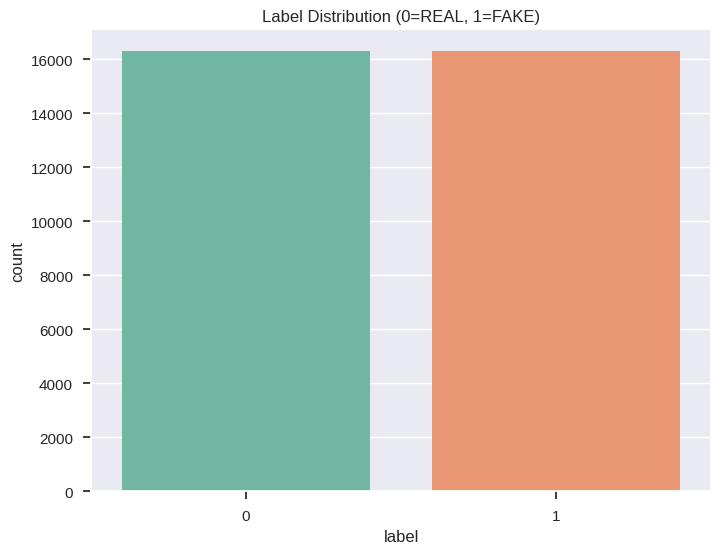

Schema of the Dataset:
videoname          object
original_width      int64
original_height     int64
label              object
original           object
dtype: object

Sample Labeled Entries from Processed Dataset:


,videoname,label
83199,awtrjchfyi.mp4,0
53211,yziqsfcxcv.mp4,0
47562,aahncigwte.mp4,0
84692,turhmezheg.mp4,0
22847,zjtifyduih.mp4,0


In [3]:
meta = pd.read_csv('/kaggle/input/deepfake-faces/metadata.csv')
print("Dataset shape:", meta.shape)
print(meta['label'].value_counts())

# Balance dataset using available samples
real_count = len(meta[meta['label'] == 'REAL'])
fake_count = len(meta[meta['label'] == 'FAKE'])
sample_size = min(20000, real_count, fake_count)
real_df = meta[meta['label'] == 'REAL'].sample(sample_size, random_state=42)
fake_df = meta[meta['label'] == 'FAKE'].sample(sample_size, random_state=42)
sample_meta = pd.concat([real_df, fake_df])

# Encode labels and split dataset
label_map = {'REAL': 0, 'FAKE': 1}
sample_meta['label'] = sample_meta['label'].map(label_map)
train_df, test_df = train_test_split(sample_meta, test_size=0.2, stratify=sample_meta['label'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

# Visualize Dataset Distribution
plt.figure(figsize=(8,6))
sns.countplot(data=sample_meta, x='label', palette='Set2')
plt.title('Label Distribution (0=REAL, 1=FAKE)')
plt.show()

print("\033[1mSchema of the Dataset:\033[0m")
print(meta.dtypes)

print("\n\033[1mSample Labeled Entries from Processed Dataset:\033[0m")
display(sample_meta[['videoname', 'label']].head())

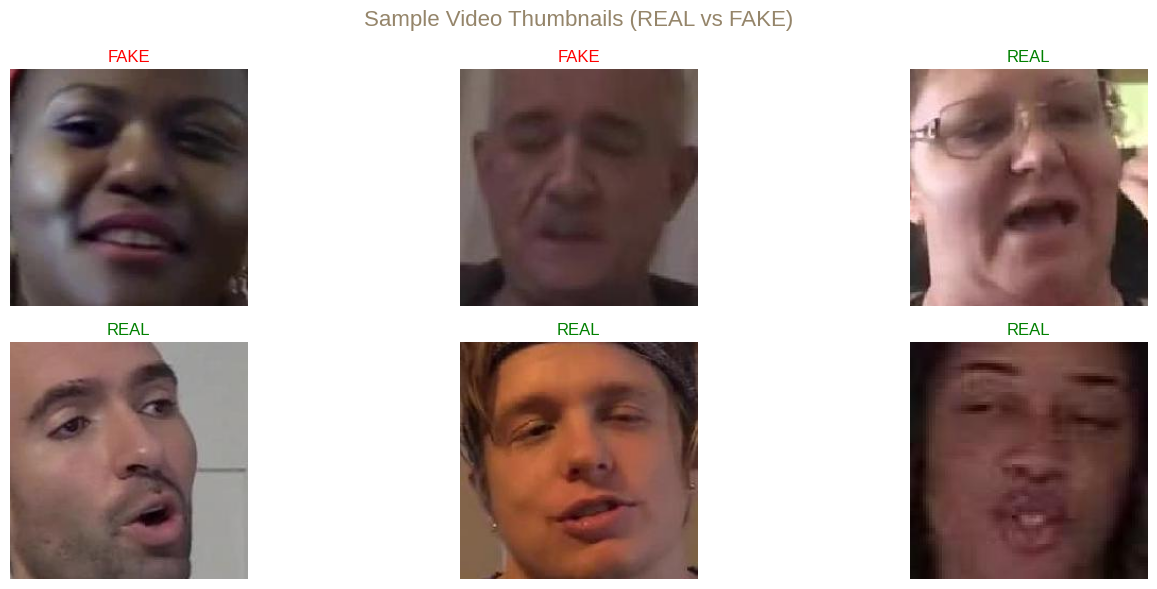

In [4]:
# Showing Thumbnails for Sample Videos
import cv2
import matplotlib.pyplot as plt

def show_sample_thumbnails(df, img_dir, num_samples=6):
    sample_df = df.sample(num_samples, random_state=1).reset_index(drop=True)
    plt.figure(figsize=(15, 6))
    
    for i in range(num_samples):
        row = sample_df.loc[i]
        img_path = os.path.join(img_dir, row['videoname'].replace('.mp4', '.jpg'))
        label = "REAL" if row['label'] == 0 else "FAKE"
        
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(2, 3, i + 1)
            plt.imshow(img)
            plt.title(f"{label}", color='green' if label == 'REAL' else 'red')
            plt.axis('off')
        else:
            print(f"Image not found: {img_path}")
    
    plt.tight_layout()
    plt.suptitle("Sample Video Thumbnails (REAL vs FAKE)", fontsize=16, color="#95856a")
    plt.subplots_adjust(top=0.88)
    plt.show()

show_sample_thumbnails(sample_meta, img_dir='/kaggle/input/deepfake-faces/faces_224', num_samples=6)


<a id="2"></a>
# <p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:120%;text-align:center;border-radius:40px 40px;">PREPREPROCESSING</p>

<p style="font-family:newtimeroman;color:#95856a;font-size:150%">
For this project, we utilize `.jpg` images extracted from deepfake videos. These face portraits are loaded efficiently using a custom <code>ImageDataGenerator</code> class based on <code>tensorflow.keras.utils.Sequence</code>, ensuring memory-efficient batch-wise loading and real-time shuffling.
</p>

<p style="font-family:newtimeroman;color:#95856a;font-size:150%">
The images are resized to <strong>(224x224)</strong> and normalized. This setup provides a balance between computational efficiency and preservation of facial features essential for deepfake detection.
</p>


In [5]:
from tensorflow.keras.utils import Sequence

class ImageDataGenerator(Sequence):
    def __init__(self, df, img_dir, batch_size=32, shuffle=True):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(self.df))
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.ceil(len(self.df) / self.batch_size))
    
    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index+1) * self.batch_size]
        batch_df = self.df.iloc[batch_indices]
        return self.__data_generation(batch_df)
    
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)
    
    def __data_generation(self, batch_df):
        images, labels = [], []
        for _, row in batch_df.iterrows():
            path = os.path.join(self.img_dir, row['videoname'].replace('.mp4', '.jpg'))
            img = cv2.imread(path)
            if img is not None:
                img = cv2.resize(img, (224, 224)) / 255.0
                images.append(img)
                labels.append(row['label'])
        return np.array(images), np.array(labels)

# Set image directory and create generators
img_dir = '/kaggle/input/deepfake-faces/faces_224'
train_gen = ImageDataGenerator(train_df, img_dir, batch_size=32, shuffle=True)
val_gen = ImageDataGenerator(val_df, img_dir, batch_size=32, shuffle=True)
test_gen = ImageDataGenerator(test_df, img_dir, batch_size=32, shuffle=False)

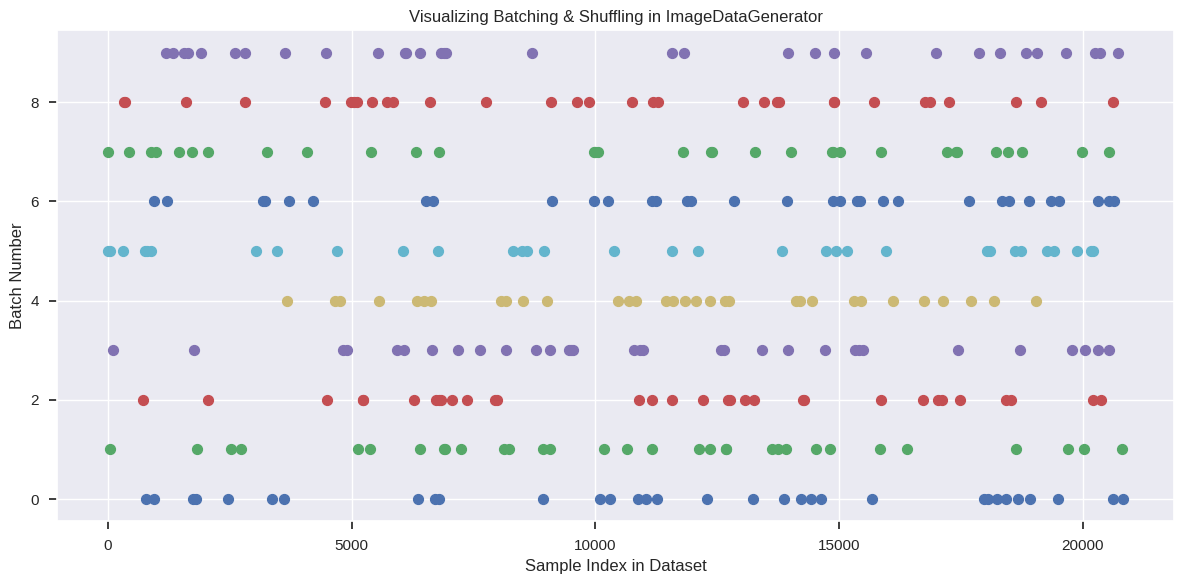

In [6]:
import matplotlib.pyplot as plt
import numpy as np


num_batches = 10
batch_size = 32


temp_gen = ImageDataGenerator(train_df, img_dir, batch_size=batch_size, shuffle=True)


batch_indices_list = []

for i in range(num_batches):
    batch_indices = temp_gen.indices[i * batch_size:(i + 1) * batch_size]
    batch_indices_list.append(batch_indices)

plt.figure(figsize=(12, 6))
for i, batch_indices in enumerate(batch_indices_list):
    plt.scatter(batch_indices, [i]*len(batch_indices), label=f'Batch {i+1}', s=50)

plt.xlabel('Sample Index in Dataset')
plt.ylabel('Batch Number')
plt.title('Visualizing Batching & Shuffling in ImageDataGenerator')
plt.grid(True)
plt.tight_layout()
plt.show()


# <p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:120%;text-align:center;border-radius:40px 40px;">MODAL DEFINITIONS</p>

<p style="font-family:newtimeroman;font-size:110%;color:#95856a;">
    <b>1. CNN Model (Convolutional Neural Network)</b><br>
    The CNN model is a basic deep learning architecture commonly used for image recognition tasks. It consists of convolutional layers followed by max-pooling layers, which are then flattened and passed through fully connected layers. Dropout is applied to avoid overfitting.<br>
    <b>Features:</b> 
    - Convolutional layers for feature extraction<br>
    - Max-pooling layers for dimensionality reduction<br>
    - Dense layers for classification<br>
    - Dropout for regularization to prevent overfitting.<br>
    <b>Activation:</b> ReLU for convolutional and dense layers, Sigmoid for the final classification output.<br>
</p>

<p style="font-family:newtimeroman;font-size:110%;color:#95856a;">
    <b>2. Xception Model</b><br>
    Xception is a deep convolutional neural network architecture that is based on depthwise separable convolutions. It is an extension of the Inception model with a more efficient and deeper architecture. The model is pre-trained on ImageNet for transfer learning.<br>
    <b>Features:</b> 
    - Base architecture: Xception (with ImageNet pre-training)<br>
    - Global average pooling for dimensionality reduction<br>
    - Fully connected layer for binary classification.<br>
    <b>Activation:</b> Sigmoid for the final classification output.<br>
    <b>Optimizer:</b> Stochastic Gradient Descent (SGD) with momentum.<br>
</p>

<p style="font-family:newtimeroman;font-size:110%;color:#95856a;">
    <b>3. ResNet50 Model</b><br>
    ResNet50 is a deep residual learning network designed to enable the training of very deep networks. It uses residual connections to solve the vanishing gradient problem, allowing for efficient learning in very deep networks. This model is also pre-trained on ImageNet.<br>
    <b>Features:</b>
    - Base architecture: ResNet50 (with ImageNet pre-training)<br>
    - Global average pooling for dimensionality reduction<br>
    - Fully connected layer for binary classification.<br>
    <b>Activation:</b> Sigmoid for the final classification output.<br>
    <b>Optimizer:</b> Adam with a low learning rate for fine-tuning.<br>
</p>

<p style="font-family:newtimeroman;font-size:110%;color:#95856a;">
    <b>4. Advanced Dense Model</b><br>
    The Advanced Dense Model is a customized deep learning architecture based on the Xception base. After the base feature extraction, several dense layers with ReLU activation are added for further learning, followed by batch normalization and dropout for regularization. This helps in mitigating overfitting while learning complex patterns.<br>
    <b>Features:</b>
    - Base architecture: Xception (with ImageNet pre-training)<br>
    - Multiple dense layers for deeper learning<br>
    - Batch normalization and dropout layers to avoid overfitting.<br>
    <b>Activation:</b> ReLU for dense layers and Sigmoid for the final output.<br>
    <b>Optimizer:</b> Adam with a low learning rate for fine-tuning.<br>
</p>


In [7]:
def build_cnn_model():
    model = Sequential([
        Input(shape=(224, 224, 3)),  
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_xception():
    base = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))
    x = GlobalAveragePooling2D()(base.output)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(base.input, output)
    for layer in base.layers:
        layer.trainable = False
    model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_resnet():
    base = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
    x = GlobalAveragePooling2D()(base.output)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(base.input, output)
    for layer in base.layers:
        layer.trainable = False
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_advanced_dense_model():
    base = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))
    x = GlobalAveragePooling2D()(base.output)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(base.input, output)
    for layer in base.layers:
        layer.trainable = False
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# TRAINING FUNCTION 

def train_model(model, train_gen, val_gen, epochs=10):
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        callbacks=[early_stop]
    )
    return history

# PLOT TRAINING HISTORY

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(acc, label='Train Acc')
    plt.plot(val_acc, label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    plt.show()

# EVALUATION FUNCTION

def evaluate_model_extended(model, test_gen):
    predictions = []
    predictions_prob = []
    true_labels = []

    for i in range(len(test_gen)):
        imgs, labels = test_gen[i]
        preds_prob = model.predict(imgs, verbose=0).ravel()
        preds = (preds_prob > 0.5).astype("int32")

        predictions.extend(preds)
        predictions_prob.extend(preds_prob)
        true_labels.extend(labels)

    print(classification_report(true_labels, predictions))

    cm = confusion_matrix(true_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    fpr, tpr, _ = roc_curve(true_labels, predictions_prob)
    auc_value = roc_auc_score(true_labels, predictions_prob)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_value:.2f})")
    plt.plot([0,1],[0,1],'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend()
    plt.show()

# INITIALIZE MODELS

models = {
    "cnn": build_cnn_model(),
    "xception": build_xception(),
    "resnet50": build_resnet(),
    "advanced_dense": build_advanced_dense_model()
}


I0000 00:00:1746677720.108702      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746677720.109478      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# <p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:120%;text-align:center;border-radius:40px 40px;">TRAINING</p>


===== Training CNN =====

Model Summary for CNN:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746677736.635523      76 service.cc:148] XLA service 0x7c3bb400c1e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746677736.636517      76 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746677736.636537      76 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746677736.944072      76 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/652 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.5391 - loss: 1.7173   

I0000 00:00:1746677741.216518      76 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


652/652 ━━━━━━━━━━━━━━━━━━━━ 303s 450ms/step - accuracy: 0.5189 - loss: 0.8780 - val_accuracy: 0.5595 - val_loss: 0.6874
Epoch 2/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 84s 128ms/step - accuracy: 0.5631 - loss: 0.6808 - val_accuracy: 0.6086 - val_loss: 0.6677
Epoch 3/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 87s 133ms/step - accuracy: 0.6214 - loss: 0.6458 - val_accuracy: 0.6222 - val_loss: 0.6556
Epoch 4/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 93s 141ms/step - accuracy: 0.6682 - loss: 0.6041 - val_accuracy: 0.6333 - val_loss: 0.6433
Epoch 5/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 87s 132ms/step - accuracy: 0.7079 - loss: 0.5616 - val_accuracy: 0.6371 - val_loss: 0.6536
Epoch 6/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 87s 132ms/step - accuracy: 0.7436 - loss: 0.5122 - val_accuracy: 0.6373 - val_loss: 0.6778
Epoch 7/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 86s 131ms/step - accuracy: 0.7808 - loss: 0.4626 - val_accuracy: 0.6314 - val_loss: 0.7303


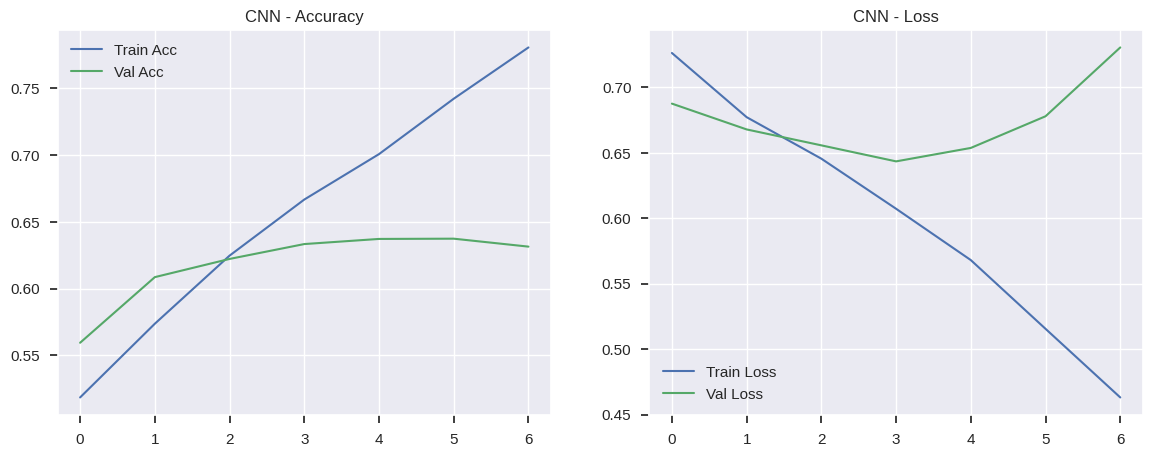


===== Evaluating CNN =====
              precision    recall  f1-score   support

           0       0.64      0.60      0.62      3259
           1       0.63      0.66      0.64      3259

    accuracy                           0.63      6518
   macro avg       0.63      0.63      0.63      6518
weighted avg       0.63      0.63      0.63      6518



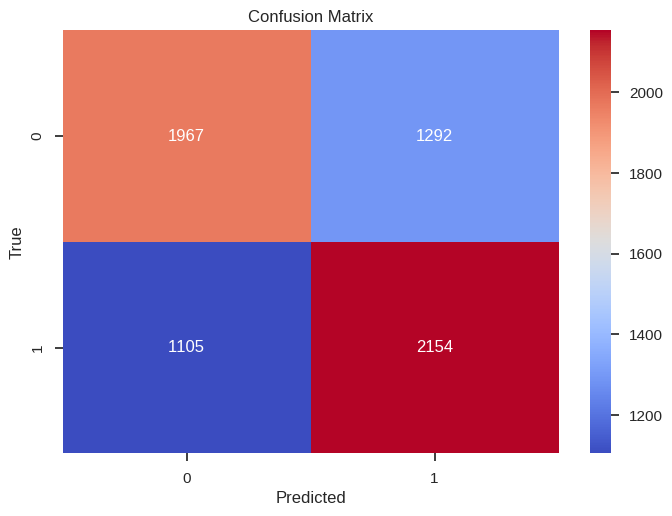

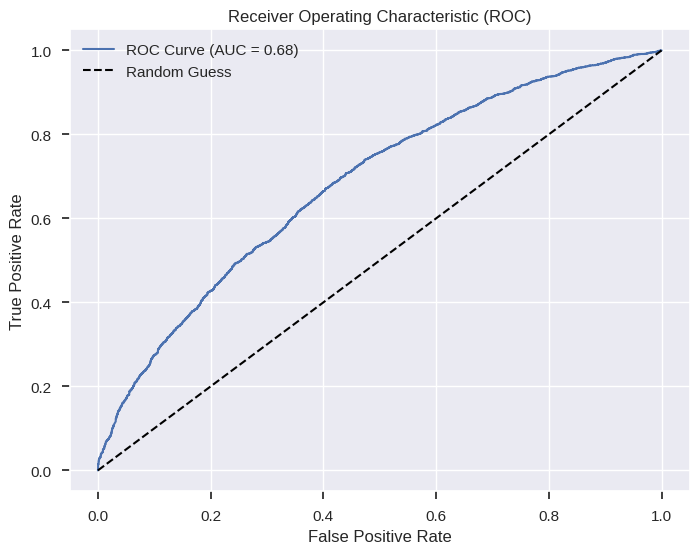

Model saved as cnn_deepfake_detector.h5

===== Training XCEPTION =====

Model Summary for XCEPTION:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 111, 111, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 111, 111, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 111, 111, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 109, 109, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 109, 109, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 109, 109, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 109, 109, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 109, 109, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 109, 109, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 55, 55, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 55, 55, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 152s 208ms/step - accuracy: 0.5846 - loss: 0.6722 - val_accuracy: 0.6270 - val_loss: 0.6573
Epoch 2/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 119s 181ms/step - accuracy: 0.6464 - loss: 0.6324 - val_accuracy: 0.5942 - val_loss: 0.7109
Epoch 3/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 120s 182ms/step - accuracy: 0.6598 - loss: 0.6218 - val_accuracy: 0.6634 - val_loss: 0.6138
Epoch 4/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 120s 182ms/step - accuracy: 0.6705 - loss: 0.6073 - val_accuracy: 0.6682 - val_loss: 0.6140
Epoch 5/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 119s 182ms/step - accuracy: 0.6712 - loss: 0.6009 - val_accuracy: 0.6713 - val_loss: 0.6036
Epoch 6/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 119s 181ms/step - accuracy: 0.6801 - loss: 0.5940 - val_accuracy: 0.6068 - val_loss: 0.6978
Epoch 7/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 119s 181ms/step - accuracy: 0.6702 - loss: 0.6044 - val_accuracy: 0.6741 - val_loss: 0.5999
Epoch 8/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 119s 181ms/step - accuracy: 0.6808 -

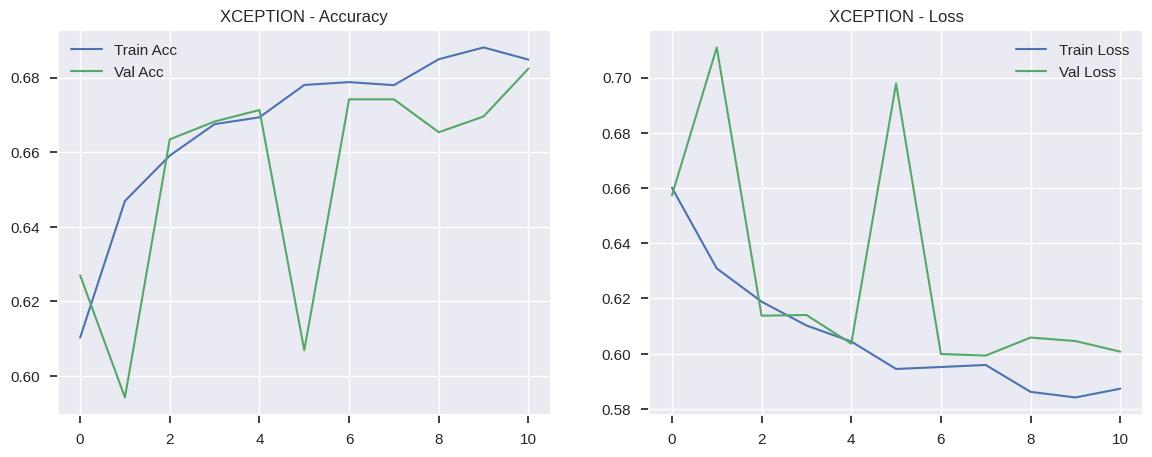


===== Evaluating XCEPTION =====
              precision    recall  f1-score   support

           0       0.70      0.64      0.67      3259
           1       0.67      0.73      0.70      3259

    accuracy                           0.69      6518
   macro avg       0.69      0.69      0.68      6518
weighted avg       0.69      0.69      0.68      6518



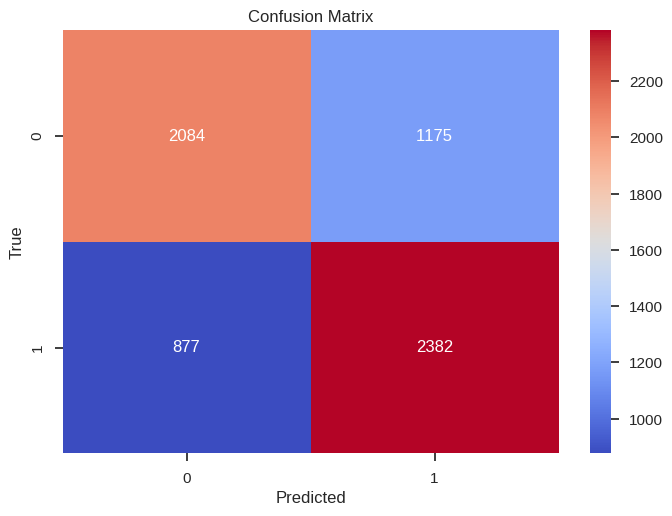

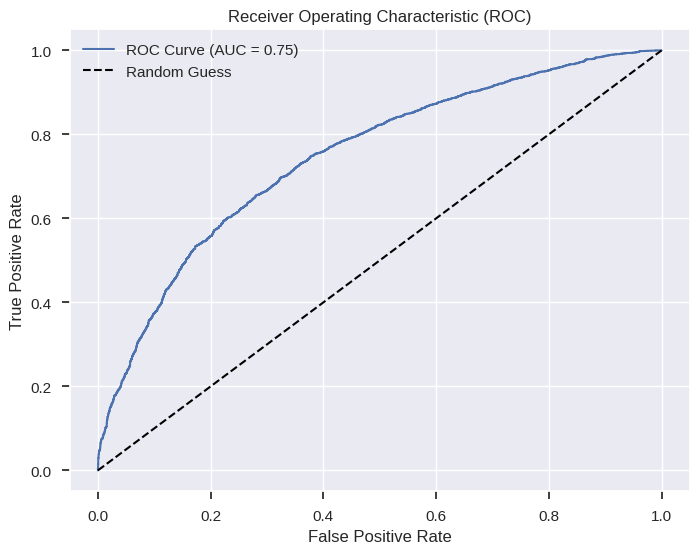

Model saved as xception_deepfake_detector.h5

===== Training RESNET50 =====

Model Summary for RESNET50:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 122s 162ms/step - accuracy: 0.4904 - loss: 0.6936 - val_accuracy: 0.5013 - val_loss: 0.6920
Epoch 2/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 88s 134ms/step - accuracy: 0.5174 - loss: 0.6917 - val_accuracy: 0.5161 - val_loss: 0.6906
Epoch 3/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 89s 135ms/step - accuracy: 0.5465 - loss: 0.6900 - val_accuracy: 0.5142 - val_loss: 0.6907
Epoch 4/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 86s 130ms/step - accuracy: 0.5421 - loss: 0.6879 - val_accuracy: 0.5685 - val_loss: 0.6880
Epoch 5/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 88s 134ms/step - accuracy: 0.5605 - loss: 0.6867 - val_accuracy: 0.5453 - val_loss: 0.6875
Epoch 6/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 85s 129ms/step - accuracy: 0.5642 - loss: 0.6858 - val_accuracy: 0.5619 - val_loss: 0.6862
Epoch 7/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 88s 133ms/step - accuracy: 0.5705 - loss: 0.6841 - val_accuracy: 0.5662 - val_loss: 0.6852
Epoch 8/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 89s 135ms/step - accuracy: 0.5771 - loss: 

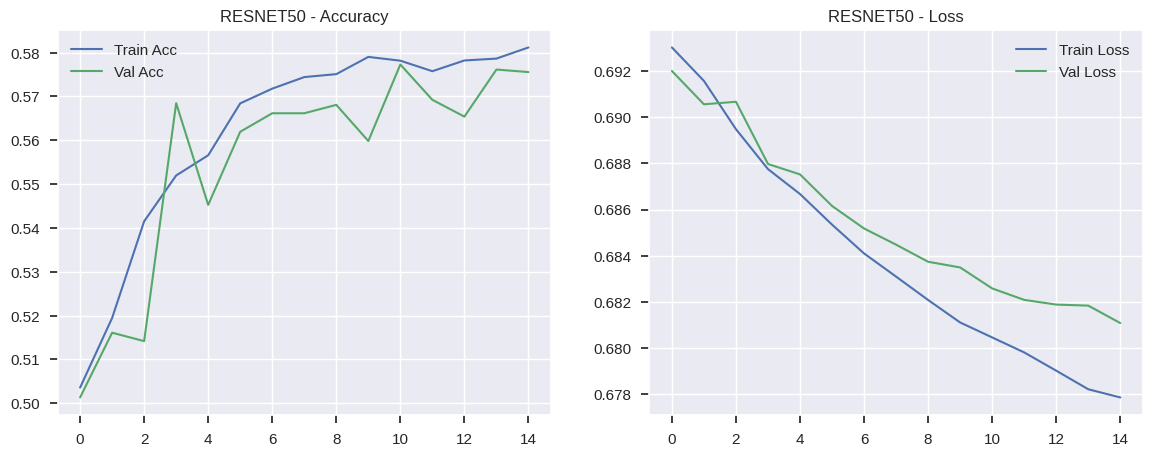


===== Evaluating RESNET50 =====
              precision    recall  f1-score   support

           0       0.59      0.56      0.57      3259
           1       0.58      0.61      0.60      3259

    accuracy                           0.58      6518
   macro avg       0.58      0.58      0.58      6518
weighted avg       0.58      0.58      0.58      6518



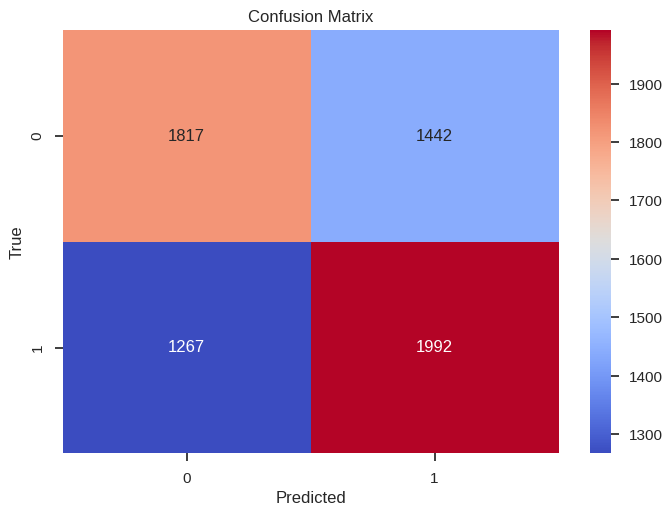

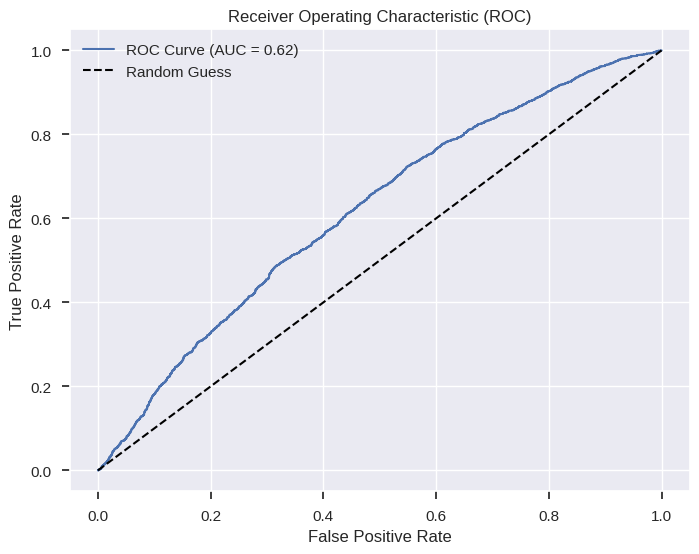

Model saved as resnet50_deepfake_detector.h5

===== Training ADVANCED_DENSE =====

Model Summary for ADVANCED_DENSE:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 111, 111, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 111, 111, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 111, 111, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 109, 109, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 109, 109, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 109, 109, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 109, 109, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 109, 109, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 109, 109, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 55, 55, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 55, 55, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 22,078,505 (84.22 MB)

 Trainable params: 1,215,233 (4.64 MB)

 Non-trainable params: 20,863,272 (79.59 MB)

Epoch 1/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 143s 197ms/step - accuracy: 0.5267 - loss: 0.9732 - val_accuracy: 0.5993 - val_loss: 0.6693
Epoch 2/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 120s 183ms/step - accuracy: 0.5481 - loss: 0.8487 - val_accuracy: 0.6185 - val_loss: 0.6507
Epoch 3/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 122s 186ms/step - accuracy: 0.5665 - loss: 0.7985 - val_accuracy: 0.6222 - val_loss: 0.6484
Epoch 4/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 120s 182ms/step - accuracy: 0.5809 - loss: 0.7577 - val_accuracy: 0.6437 - val_loss: 0.6258
Epoch 5/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 120s 183ms/step - accuracy: 0.5914 - loss: 0.7268 - val_accuracy: 0.6527 - val_loss: 0.6222
Epoch 6/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 120s 182ms/step - accuracy: 0.5956 - loss: 0.7035 - val_accuracy: 0.6438 - val_loss: 0.6230
Epoch 7/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 120s 183ms/step - accuracy: 0.6125 - loss: 0.6807 - val_accuracy: 0.6630 - val_loss: 0.6075
Epoch 8/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 120s 183ms/step - accuracy: 0.6285 -

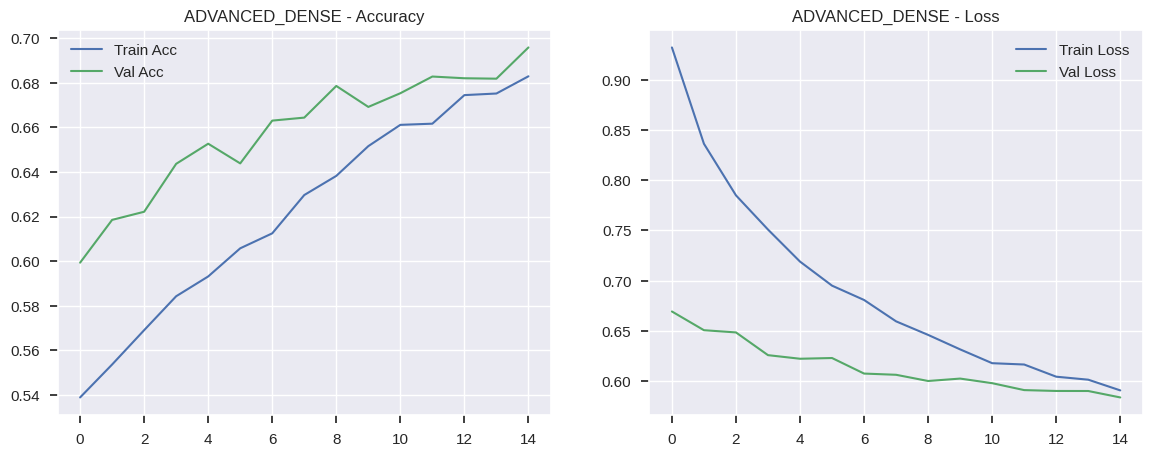


===== Evaluating ADVANCED_DENSE =====
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      3259
           1       0.70      0.67      0.68      3259

    accuracy                           0.69      6518
   macro avg       0.69      0.69      0.69      6518
weighted avg       0.69      0.69      0.69      6518



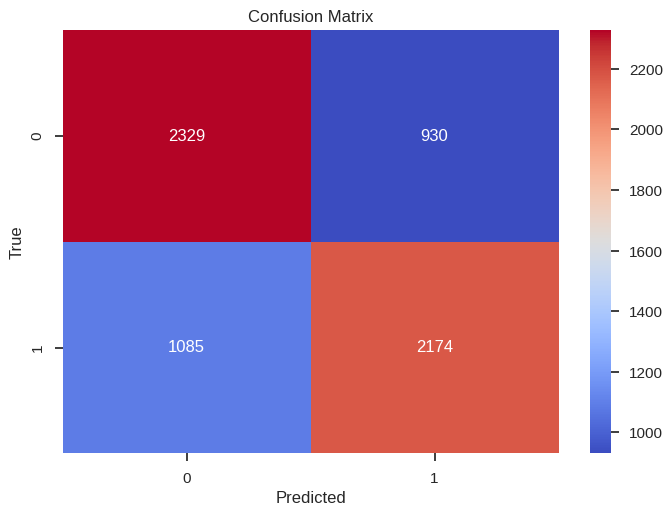

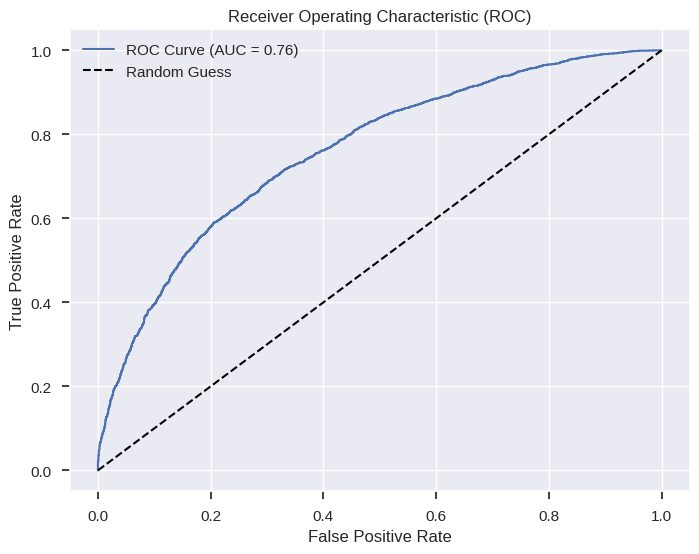

Model saved as advanced_dense_deepfake_detector.h5


In [8]:
def visualize_model_architecture(model, model_name):
    print(f"\nModel Summary for {model_name.upper()}:")
    model.summary()

for name, model in models.items():
    print(f"\n===== Training {name.upper()} =====")
    visualize_model_architecture(model, name)
    
    history = train_model(model, train_gen, val_gen, epochs=15)  # You can increase if needed
    plot_history(history, name.upper())
    
    print(f"\n===== Evaluating {name.upper()} =====")
    evaluate_model_extended(model, test_gen)
    
    model_filename = f"{name.lower()}_deepfake_detector.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# <p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:120%;text-align:center;border-radius:40px 40px;"> Gradio User Interface</p>

In [9]:
# ---------------------------------------------------------------
# AI/ML-based Solution for Detection of Face-Swap Based Deepfake Images/Videos
# Author: Aditya Singh
# Date: 2025-05-08
# ---------------------------------------------------------------

"""
Jai Shree Ram 

⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⣦⣶⣾⣿⣷⣶⣶⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣶⣿⣟⠯⠓⣉⣩⣭⣝⣻⣿⣶⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⣾⣿⠗⢡⣴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣿⣿⠏⣰⣿⣿⣿⣿⣿⣿⣿⠋⣿⣿⣿⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⣿⣿⣿⢠⣿⣿⣿⣿⣿⠿⢿⣿⣀⣿⣿⣿⣿⣷⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿⣸⣿⣿⣿⠋⠀⠀⠀⣨⣩⠉⠀⢹⣿⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠻⣿⣿⣿⣿⡏⣀⣀⣀⣀⢧⣿⠂⣀⠀⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣶⣿⣿⠗⡤⢤⣀⡉⠊⡱⢋⣉⣉⣷⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣿⡝⣿⣿⠀⠈⠙⠿⠃⠀⡇⠽⠛⢻⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣴⣿⣿⣿⣿⣿⡀⠀⣀⠤⠾⣄⡹⣄⠀⢸⣧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⣿⣋⢹⣿⣿⣷⡾⢄⠀⠀⠀⠀⢈⣶⣿⠿⣿⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⣇⣸⣿⣿⣿⣿⣿⡏⢻⣿⣿⣇⠈⠡⢄⣀⠐⢉⣿⣿⣴⣿⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⣿⡿⠟⢻⣿⣿⣿⠀⠀⠻⣿⣿⣷⣤⣄⣠⣴⣿⣿⣿⣿⣿⣿⣿⣇⡀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⣠⠔⠒⠒⠉⠀⠀⠀⣿⣿⣿⡇⠀⠀⠀⠉⠛⢿⣿⡿⠛⠋⠘⣿⣿⠿⢯⠛⡂⠤⢄⡀⠀⠀⠀⠀
⠀⣠⠊⠁⠀⠀⠀⠀⠀⠀⠀⢻⠁⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠀⠀⠀⠀⠀⡇⠀
⣰⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢇⠀⠀⢣⠒⠲⠤⣀⡀⠀⡀⣀⠤⠒⠂⠸⡀⠀⢱⠀⠀⠀⠀⠀⠀⠙⣄
⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢆⡀⠀⢣⡀⠀⠈⠀⠈⠀⠃⠀⠀⠀⠰⠧⠀⠚⠀⠀⠀⠀⠀⠀⠀⠙
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠐⠛⠲⠻⠷⠒⠞⠂⠸⠣⠲⠖⠖⠀⠂⠻⠻⠿⠼⠟⠿⠧⠿⠃⠀⠀⠀⠀⠀⠀⠀

"""

import gradio as gr
import numpy as np
import cv2
import tempfile
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


model_files = {
    "CNN": "cnn_deepfake_detector.h5",
    "Xception": "xception_deepfake_detector.h5",
    "ResNet50": "resnet50_deepfake_detector.h5",
    "Advanced Dense": "advanced_dense_deepfake_detector.h5"
}
models = {name: load_model(path) for name, path in model_files.items()}


def preprocess_image(img):
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    return np.expand_dims(img, axis=0)


def predict_single_model(img, model):
    return model.predict(preprocess_image(img))[0][0]


def predict_ensemble(img):
    preds = [predict_single_model(img, model) for model in models.values()]
    return np.mean(preds), preds


def plot_confidence(preds):
    fig, ax = plt.subplots()
    bars = ax.bar(models.keys(), preds, color=['#EF476F', '#FFD166', '#06D6A0', '#118AB2'])
    ax.set_ylim(0, 1)
    ax.set_ylabel("Confidence (Fake)")
    ax.set_title("Model Predictions")
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')
    return fig


def handle_image(img, model_name, use_ensemble):
    if use_ensemble:
        avg_pred, preds = predict_ensemble(img)
        label = "FAKE" if avg_pred > 0.5 else "REAL"
        conf = avg_pred if avg_pred > 0.5 else 1 - avg_pred
        fig = plot_confidence(preds)
        return f"{label} with {conf:.2f} confidence (ensemble)", fig
    else:
        model = models[model_name]
        pred = predict_single_model(img, model)
        label = "FAKE" if pred > 0.5 else "REAL"
        conf = pred if pred > 0.5 else 1 - pred
        return f"{label} with {conf:.2f} confidence", None


def predict_video(video_file, model_name, use_ensemble):
    cap = cv2.VideoCapture(video_file)
    frame_count, results = 0, []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % 30 == 0:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_resized = cv2.resize(frame_rgb, (224, 224))
            frame_preprocessed = frame_resized / 255.0
            frame_input = np.expand_dims(frame_preprocessed, axis=0)

            if use_ensemble:
                preds = [model.predict(frame_input)[0][0] for model in models.values()]
                results.append(np.mean(preds))
            else:
                pred = models[model_name].predict(frame_input)[0][0]
                results.append(pred)

        frame_count += 1

    cap.release()
    if not results:
        return "Could not process video."

    avg_pred = np.mean(results)
    label = "FAKE" if avg_pred > 0.5 else "REAL"
    confidence = avg_pred if avg_pred > 0.5 else 1 - avg_pred
    return f"{label} with {confidence:.2f} confidence ({'ensemble' if use_ensemble else model_name})"

# Gradio 
with gr.Blocks(theme=gr.themes.Base(), css="body { background-color: #1e1e1e; color: white; }") as demo:
    gr.Markdown("# 🌟 Deepfake Detector (Dark Mode + Ensemble + Visuals)")

    model_choice = gr.Dropdown(choices=list(models.keys()), value="Advanced Dense", label="Choose Model")
    use_ensemble = gr.Checkbox(label="Use Ensemble of All Models")

    with gr.Tab("🖼️ Image"):
        img_input = gr.Image(type="numpy", label="Upload Image")
        img_output = gr.Textbox(label="Prediction")
        img_plot = gr.Plot(label="Confidence per Model")
        img_button = gr.Button("Detect Image")
        img_button.click(fn=handle_image, inputs=[img_input, model_choice, use_ensemble], outputs=[img_output, img_plot])

    with gr.Tab("🎥 Video"):
        vid_input = gr.Video(label="Upload Video")
        vid_output = gr.Textbox(label="Prediction")
        vid_button = gr.Button("Detect Video")
        vid_button.click(fn=predict_video, inputs=[vid_input, model_choice, use_ensemble], outputs=vid_output)

    gr.Markdown("""
    **Notes:**
    - Image predictions support model-wise breakdown.
    - Video predictions use every 30th frame.
    - Toggle ensemble to combine all models.
    """)

demo.launch()

* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://07dafa324a365593a0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


<a id="gradio-interface"></a>
# <p style="background-color:#95856a;font-family:'Times New Roman';color:#D8CA7E;font-size:120%;text-align:center;border-radius:40px 40px;">GRADIO INTERFACE SAMPLE</p>

<p style="font-family:'Times New Roman';color:#95856a;font-size:150%">
    Below is a snapshot of the <strong>Gradio</strong> web interface used in the this project:
</p>

<p align="center">
    <img src="https://raw.githubusercontent.com/EchoSingh/Deepfake-PRNU-Shield/main/UI_images/1.jpg" alt="Gradio Interface Sample" width="80%" style="border-radius: 20px; border: 2px solid #95856a;">
</p>

<p style="font-family:'Times New Roman';color:#95856a;font-size:120%">
    This interface allows users to upload an image or video frame and detect if its real or fake.
</p>
